In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear


In [2]:
#Reading data 
#Data set : https://pjreddie.com/media/files/mnist_train.csv
df = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')

In [3]:
#Analyzing the Dateset , 
#first column is label, rest is pixel values 
#Each row contains a label and 28*28= 784 pixel values
df.shape
df.head(3)



,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Visualizing the Data
#First row of dataset, first column is label  
img = df.iloc[0, 1:]
imgarr= img.to_numpy()
imgarr = imgarr.reshape((28,28))
imgarr.shape



(28, 28)

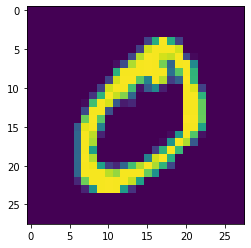

In [5]:
#Using matplotlib to convert pixel values to image
imgplot = plt.imshow(imgarr)

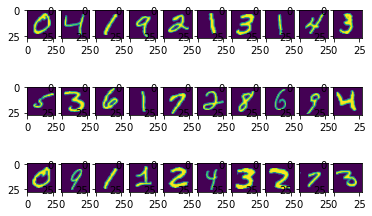

In [6]:
# First 30 rows 
for i in range(30):
  img = df.iloc[i, 1:]
  imgarr= img.to_numpy()
  imgarr = imgarr.reshape((28,28))
  imgarr.shape
  plt.subplot(3,10,i+1)
  imgplot = plt.imshow(imgarr)
  

In [7]:
#Spliting the Data
train_set, test_set = train_test_split(df.to_numpy(),test_size=0.2)
xlabel_train = train_set[:, 1:]
ylabel_train = train_set[:,0]
xlabel_test = test_set[:,1:]
ylabel_test = test_set[:, 0]
xlabel_train.shape, ylabel_train.shape,xlabel_test.shape, 

((47999, 784), (47999,), (12000, 784))

In [128]:
# Neral Netwrok 
#Input = 28*28 vector = 784 units
# Hidden Layer 1: 64 units, relu activation
#Hidden Layer 2 : 25 Units, relu activation
#Output Layer: 10 units, Linear softmax
#Optimizer: Adam
#Testing differnent combination of hidden units, layer 1 = 400 units and layer 2 = 100
def neural_network(layer1_units, layer2_units):
  model = Sequential(
      [
          tf.keras.Input(shape=(784,)),
          tf.keras.layers.Dense(layer1_units, activation= 'relu'),
          tf.keras.layers.Dense(layer2_units, activation = 'relu'),
          tf.keras.layers.Dense(10, activation = 'linear')
      ]
  )
  model.compile(
      loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 )
  )
  history = model.fit(
      xlabel_train,
      ylabel_train,
      epochs= 20
  )
  return (model, history)
(model, history) = neural_network(400, 100)



Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 1.5861
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3871
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2542
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1900
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1489
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1339
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1207
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1069
Epoch 9/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1033
Epoch 10/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0870
Epoch 11/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0918
Epoch 12/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0765
E

In [129]:
print(history.history["loss"][-1])

0.0656973123550415


In [130]:
# Predicting the output of test set
ypredict = model.predict(xlabel_test)
ypredict.shape


375/375 [==============================] - 1s 3ms/step


(12000, 10)

In [131]:
# Computing Softmax activation
y_output = tf.nn.softmax(ypredict)
y_output = y_output.numpy()
y_predicted = np.argmax(y_output, axis=1) 
print(y_predicted[:5])


[0 7 5 2 4]


In [132]:
# Calculating the Accuracy of Model 
diff = ylabel_test - y_predicted
count = np.count_nonzero(diff==0)
accuracy = (count/len(ylabel_test))*100
print(f"The accuracy of Model: {accuracy}% ")

The accuracy of Model: 97.25833333333334% 


In [ ]:
#Trying different units combination 
#Varying layer1 units 
hidden_unit = np.array(0)
layer_loss = np.array(0)
for i in range(25,100,10):
  print(f"Trying {i} units in Hidden Layer 1................. ")
  (model, history)  = neural_network(i, 25)
  hidden_unit = np.append(hidden_unit, i) 
  layer_loss = np.append(layer_loss, history.history["loss"][-1])

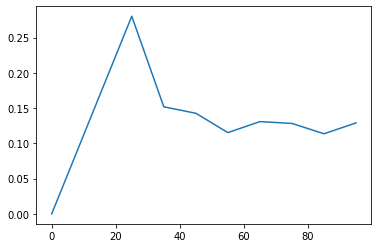

In [17]:
#Ploting the units and respective loss
plt.plot(hidden_unit,layer_loss)
plt.show()


In [ ]:
#Result Trying more hidden units in layer 1 may or may not decrease the loss
#Now Trying Different combination of hidden units in layer 2

In [103]:
#Trying out different hidden units in layer 2
# units = 100 in layer 1
np.array([[],[]])
units_and_loss = np.array([]) 
for i in range(20,60,10):
  print(f"Trying {i} units in Hidden Layer 2................. ")
  (model, history)  = neural_network(100, i)
  units_and_loss = np.append(units_and_loss, [i, history.history["loss"][-1]]) 



Trying 20 units in Hidden Layer 2................. 
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.0555
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5258
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2859
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9537
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5801
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3571
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2496
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2060
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1796
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1606
Trying 30 units in Hidden Layer 2................. 
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/st

In [ ]:
#Reshaping the array that captured loss and units
units_and_loss =  np.reshape(units_and_loss,(int(len(units_and_loss)/2),2))

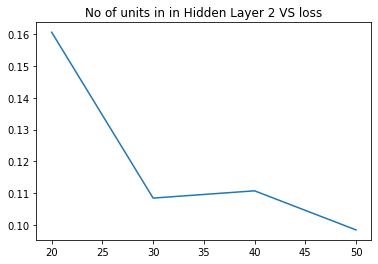

In [118]:
plt.plot(units_and_loss[:,0], units_and_loss[:,1])
plt.title("No of units in in Hidden Layer 2 VS loss")
plt.show()
# The loss decreases with increase in no of units in layer 2

In [ ]:
recorder= np.array([]) # This will record the diffrent test values 

In [119]:
#Trying 
(model, history)  = neural_network(300, 100)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 1.6863
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2654
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2000
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1676
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1355
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1396
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1069
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1102
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0919
Epoch 10/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0879


In [120]:
#Trying 
(model, history)  = neural_network(400, 100)


Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3563
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2892
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2124
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1679
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1354
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1269
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1072
Epoch 8/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0949
Epoch 9/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0844
Epoch 10/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0852


In [122]:
#Trying 
(model, history)  = neural_network(500, 100)
#Result: Increasing no of units in layer 1 won't improve performance anymore 

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.3603
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3510
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2206
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1606
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1418
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1225
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1161
Epoch 8/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0971
Epoch 9/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1002
Epoch 10/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0878


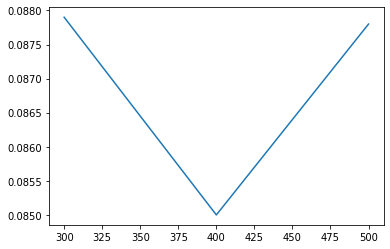

In [124]:
plt.plot([300,400,500],[0.0879,0.085,0.0878])
plt.show()

In [125]:
#Trying 
(model, history)  = neural_network(400, 200)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.7958
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2157
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1772
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1616
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1393
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1337
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1143
Epoch 8/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0980
Epoch 9/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0952
Epoch 10/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0889
